In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wfdb

In [3]:
from scipy.signal import savgol_filter

In [4]:
from scipy.signal import buttord, butter, filtfilt, lfilter

## ECG Data for introduction.

In [117]:
# Load the WFDB record and the physical samples
N = 10000
record = wfdb.rdrecord('rawdata/intro/100', sampfrom=0, sampto=N, channels=[0])
fsamp = record.__dict__['fs']
tsamp = 1 / fsamp 
rawecg = record.__dict__['p_signal'][:, 0]
time = np.arange(0, N * tsamp, tsamp)

# Add baseline wandering to ECG.
blnoise = savgol_filter(np.cumsum(np.random.random(N) - 0.5), 721, 0) * tsamp * 50
hfnoise = np.random.normal(size=N) * tsamp * 50
n_ord0, w_n0 = buttord(50, 70, 3, 80, analog=False, fs=fsamp)
b0, a0 = butter(n_ord0, w_n0, btype='high', analog=False, output='ba', fs=fsamp)
hfnoise = filtfilt(b, a, hfnoise)
measecg = rawecg + blnoise + hfnoise

# Removing baseline wandering.
n_ord1, w_n1 = buttord(0.5, 0.05, 3, 40, analog=False, fs=fsamp)
b1, a1 = butter(n_ord1, w_n1, btype='high', analog=False, output='ba', fs=fsamp)
ecg1 = filtfilt(b1, a1, measecg)

# Remoove high frequency noise.
n_ord2, w_n2 = buttord(50, 100, 3, 80, analog=False, fs=fsamp)
b2, a2 = butter(n_ord2, w_n2, btype='low', analog=False, output='ba', fs=fsamp)
ecg2 = filtfilt(b2, a2, ecg1)

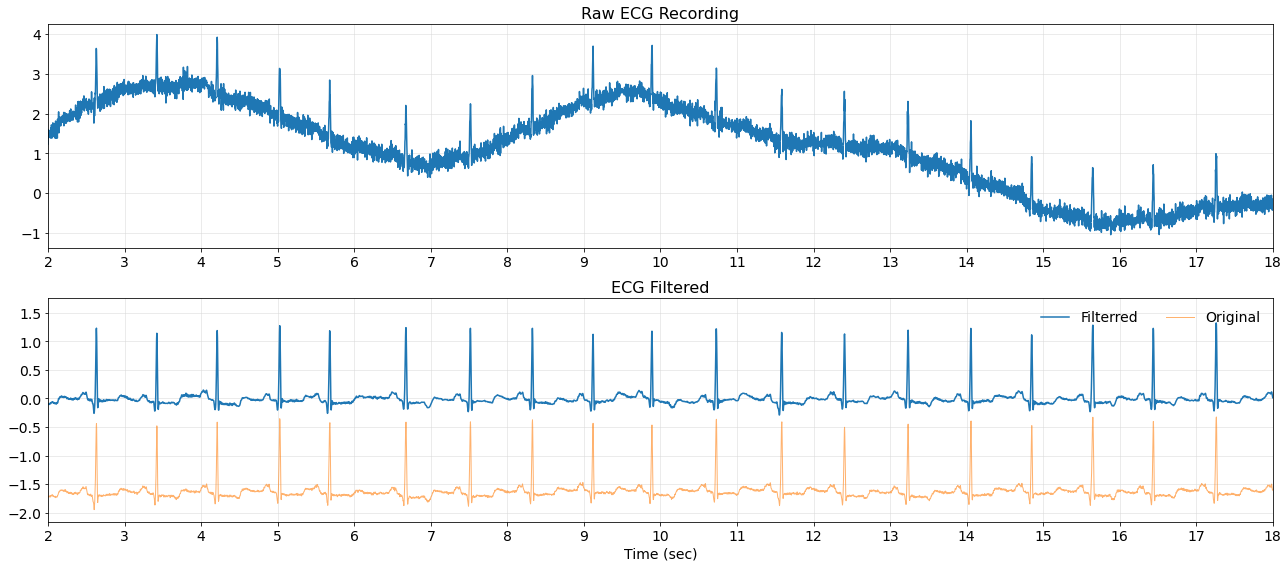

In [134]:
fig = figure(figsize=(18, 8))
ax = fig.add_subplot(211)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
# ax.plot(time, rawecg)
ax.plot(time, measecg)
xticks(np.arange(time[0], time[-1] + 1, 1), fontsize=14)
yticks(fontsize=14)
ax.set_xlim(2, 18)
# ax.set_ylim(-5, 3)
# ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_title("Raw ECG Recording", fontsize=16)

ax = fig.add_subplot(212)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
# ax.plot(time, rawecg)
ax.plot(time, ecg2, label="Filterred")
ax.plot(time, rawecg - 1.3, alpha=0.6, lw=1, label="Original")
xticks(np.arange(time[0], time[-1] + 1, 1), fontsize=14)
yticks(fontsize=14)
ax.set_xlim(2, 18)
# ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_title("ECG Filtered", fontsize=16)
ax.legend(loc=1, fontsize=14, frameon=False, ncol=2)

tight_layout()

fig.savefig(f"output/intro/ecg.svg", format="svg", dpi=300);
fig.savefig(f"output/intro/ecg.png", format="png", dpi=300);

### EMG for introduction

In [170]:
N = 10000
record_emg = wfdb.rdrecord('rawdata/intro/S0088_ST_V1', sampfrom=0, sampto=N, channels=[0])
rawemg = record_emg.__dict__['p_signal'][:, 0]
fsamp = record_emg.__dict__['fs']
tsamp = 1 / fsamp
time = np.arange(0, N * tsamp, tsamp)

# causal EMG amplitude
Tf = 0.03
Nf = int(Tf / tsamp)
b, a = np.ones(Nf) / Nf, np.ones(1)
emgampc = lfilter(b, a, lfilter(b, a, np.abs(rawemg)))

# non-causal EMG amplitude
emgampnc = filtfilt(b, a, np.abs(rawemg))

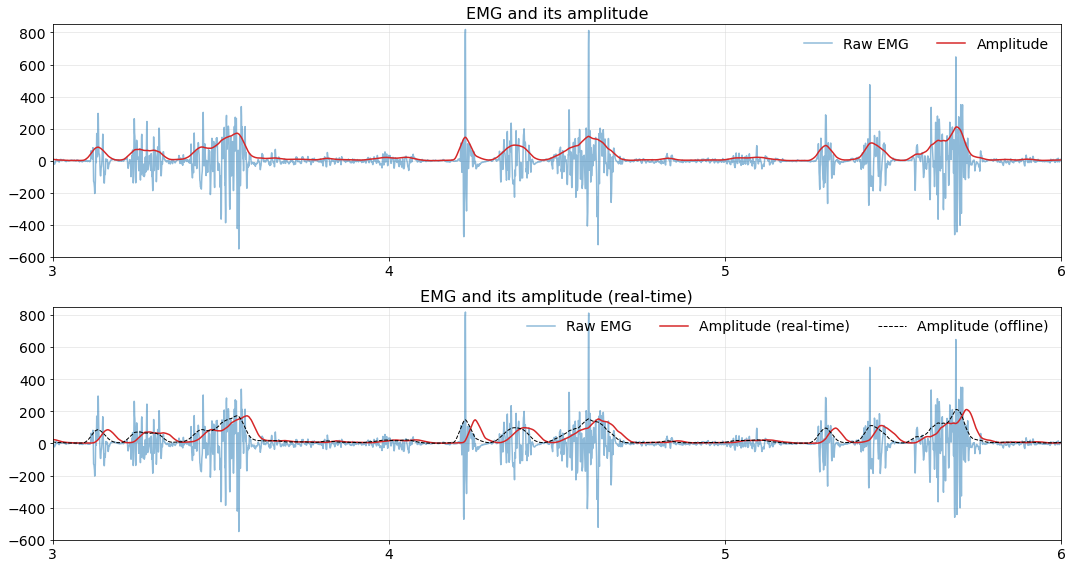

In [178]:
fig = figure(figsize=(15, 8))
ax = fig.add_subplot(211)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
# ax.plot(time, rawecg)
ax.plot(time, rawemg, alpha=0.5, label="Raw EMG")
ax.plot(time, emgampnc, color="tab:red", label="Amplitude")
xticks(np.arange(time[0], time[-1] + 1, 1), fontsize=14)
yticks(fontsize=14)
ax.set_xlim(3, 6)
ax.set_ylim(-600, 850)
# ax.set_ylim(-5, 3)(sec)", fontsize=14)
ax.set_title("EMG and its amplitude", fontsize=16)
ax.legend(loc=1, fontsize=14, frameon=False, ncol=2)

ax = fig.add_subplot(212)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
# ax.plot(time, rawecg)
ax.plot(time, rawemg, alpha=0.5, label="Raw EMG")
ax.plot(time, emgampc, color="tab:red", label="Amplitude (real-time)")
ax.plot(time, emgampnc, color="black", lw=1, ls="dashed", label="Amplitude (offline)")
xticks(np.arange(time[0], time[-1] + 1, 1), fontsize=14)
yticks(fontsize=14)
ax.set_xlim(3, 6)
# ax.set_ylim(-5, 3)
# ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_ylim(-600, 850)
ax.set_title("EMG and its amplitude (real-time)", fontsize=16)
ax.legend(loc=1, fontsize=14, frameon=False, ncol=3)

tight_layout()

fig.savefig(f"output/intro/emg.svg", format="svg", dpi=300);
fig.savefig(f"output/intro/emg.png", format="png", dpi=300);

### EEG data

In [32]:
N = 12000
record = wfdb.rdrecord('rawdata/intro/eeg_1', sampfrom=0, sampto=N, channels=[0])
fsamp = record.__dict__['fs']
tsamp = 1 / fsamp 
raweeg = record.__dict__['p_signal'][:, 0]
time = np.arange(0, N * tsamp, tsamp)

# Removing baseline wandering.
n_ord1, w_n1 = buttord(0.5, 0.05, 3, 40, analog=False, fs=fsamp)
b1, a1 = butter(n_ord1, w_n1, btype='high', analog=False, output='ba', fs=fsamp)
eeg1 = filtfilt(b1, a1, raweeg)

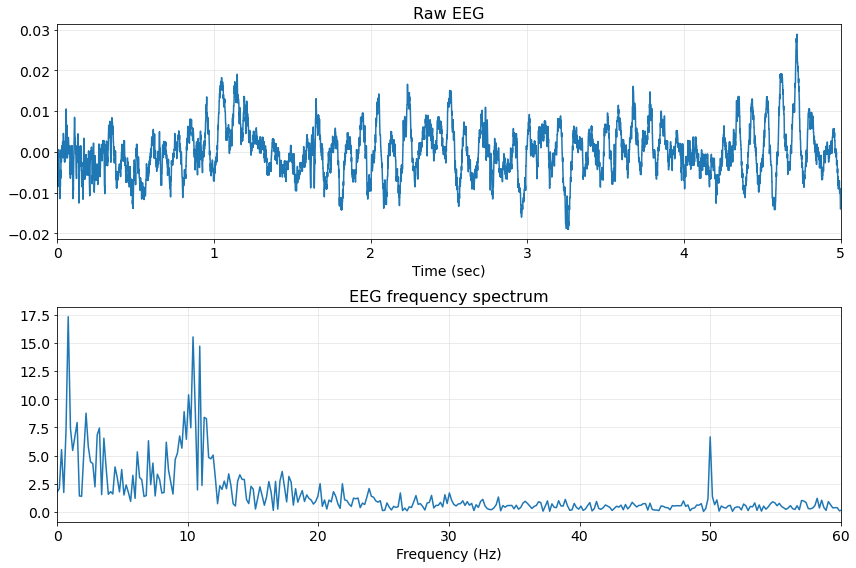

In [42]:
fig = figure(figsize=(12, 8))
ax = fig.add_subplot(211)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
ax.plot(time, eeg1)
xticks(np.arange(time[0], time[-1] + 1, 1), fontsize=14)
yticks(fontsize=14)
ax.set_xlim(0, 5)
ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_title("Raw EEG", fontsize=16)

ax = fig.add_subplot(212)
ax.grid(color='0.85', linestyle='-', linewidth=0.5)
freq = fft.rfftfreq(N) * fsamp
ax.plot(freq, np.abs(fft.fft(eeg1))[:len(freq)])
xticks(fontsize=14)
yticks(fontsize=14)
ax.set_xlim(0, 60)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
ax.set_title("EEG frequency spectrum", fontsize=16)
plt.tight_layout() 
fig.savefig(f"output/intro/eeg.svg", format="svg", dpi=300);
fig.savefig(f"output/intro/eeg.png", format="png", dpi=300);